In [1]:
import pandas as pd

df = pd.read_csv('developer_dataset.csv')
print(df.head())
print(df.columns)
print(df.count())
df.describe()



   RespondentID  Year        Country          Employment  \
0             1  2018  United States  Employed full-time   
1             1  2019  United States  Employed full-time   
2             1  2020  United States  Employed full-time   
3             2  2018  United States  Employed full-time   
4             2  2019  United States  Employed full-time   

                                      UndergradMajor  \
0  Computer science, computer engineering, or sof...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                                             DevType  \
0           Engineering manager;Full-stack developer   
1                              Developer, full-stack   
2                                                NaN   
3                               Full-stack developer   
4  Data or business an

C:\Users\pedro\AppData\Local\Temp\ipykernel_15192\3571538619.py:3: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


In [2]:
max_rows = df['RespondentID'].count()
missing_data = round(100 - (100 * df.count()/max_rows), 2)

print('The percentage of missing data is ' + str(missing_data) + '%')

##Columns with more than 60% of missing data can be removed
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis=1, inplace=True)


The percentage of missing data is RespondentID               0.00
Year                       0.00
Country                    0.00
Employment                 1.60
UndergradMajor            11.47
DevType                    9.69
LanguageWorkedWith         8.26
LanguageDesireNextYear    13.64
DatabaseWorkedWith        22.79
DatabaseDesireNextYear    33.25
PlatformWorkedWith        17.62
PlatformDesireNextYear    23.23
Hobbyist                  38.54
OrgSize                   50.72
YearsCodePro              14.76
JobSeek                   45.55
ConvertedComp             17.87
WorkWeekHrs               54.06
NEWJobHunt                82.80
NEWJobHuntResearch        83.20
NEWLearn                  78.22
dtype: float64%


                RespondentID
Country                     
Canada                  8979
China                   2072
France                  6861
Germany                16215
Japan                   1049
Mexico                  1918
Spain                   4534
United Kingdom         15854
United States          53727
          Country  Employment  DevType
0          Canada         148      944
1           China         139      491
2          France         104      848
3         Germany         386     1691
4           Japan          13      109
5          Mexico          25      207
6           Spain          74      434
7  United Kingdom         196     1472
8   United States         699     4580


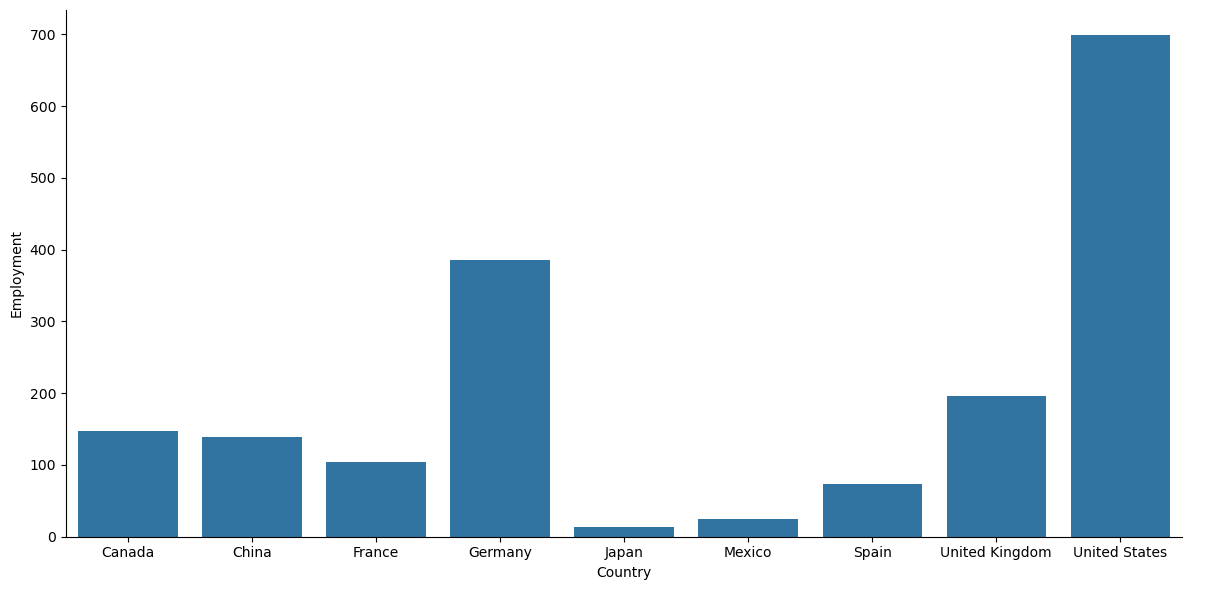

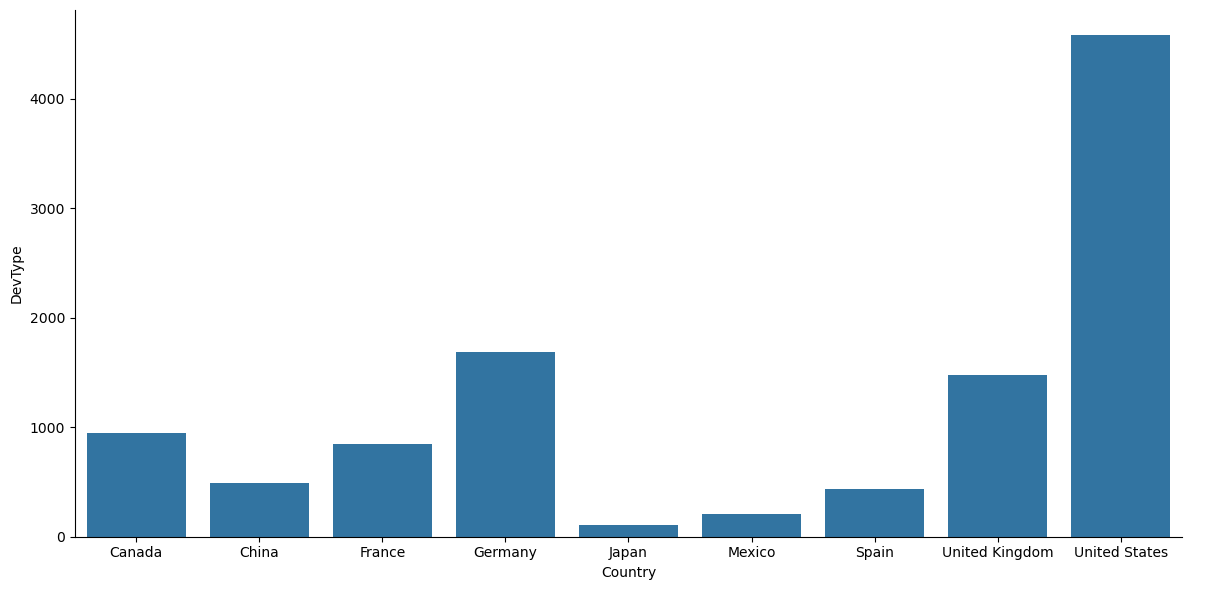

In [3]:
import seaborn as sns

print(df[['RespondentID', 'Country']].groupby('Country').count())
missing_data = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()
print(missing_data)

A = sns.catplot(data=missing_data,
                kind='bar',
                x='Country',
                y='Employment',
                height=6,
                aspect=2)



B = sns.catplot(data=missing_data,
                kind='bar',
                x='Country',
                y='DevType',
                height=6,
                aspect=2)

In [4]:
df_filtered = df.dropna(subset=['Employment','DevType'], 
                        how='any')

print(df_filtered.count())

##delete rows that do not have either Employment or DevType

RespondentID              99975
Year                      99975
Country                   99975
Employment                99975
UndergradMajor            90585
DevType                   99975
LanguageWorkedWith        93514
LanguageDesireNextYear    88101
DatabaseWorkedWith        80241
DatabaseDesireNextYear    69346
PlatformWorkedWith        84252
PlatformDesireNextYear    78553
Hobbyist                  59930
OrgSize                   53849
YearsCodePro              86552
JobSeek                   56951
ConvertedComp             83316
WorkWeekHrs               50292
dtype: int64


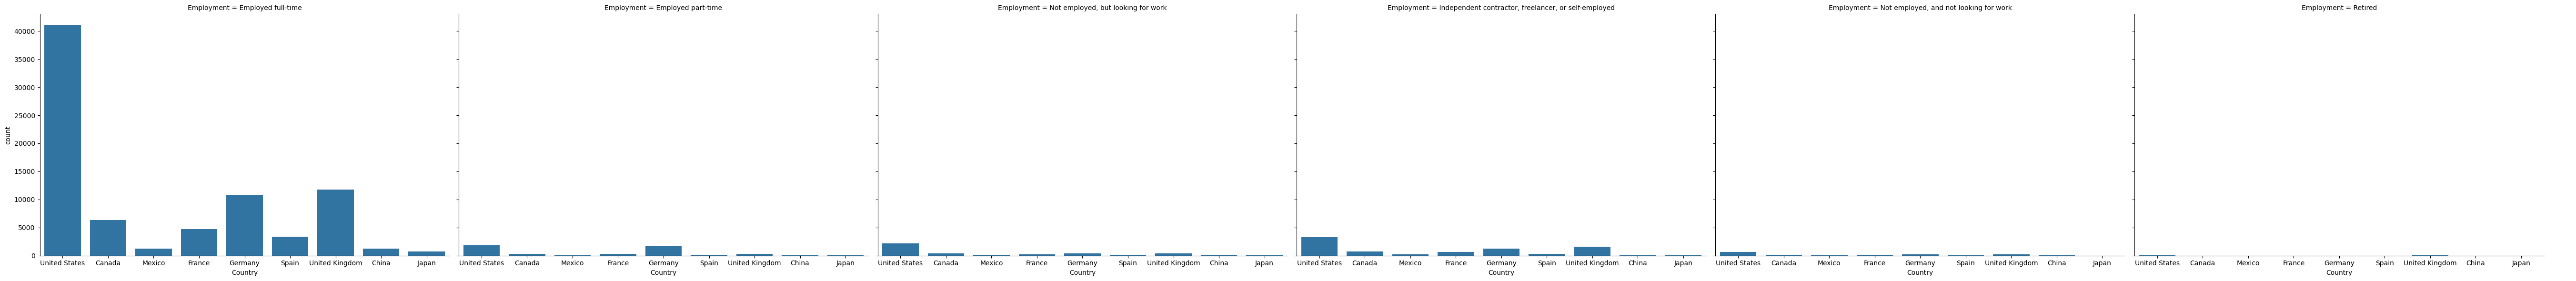

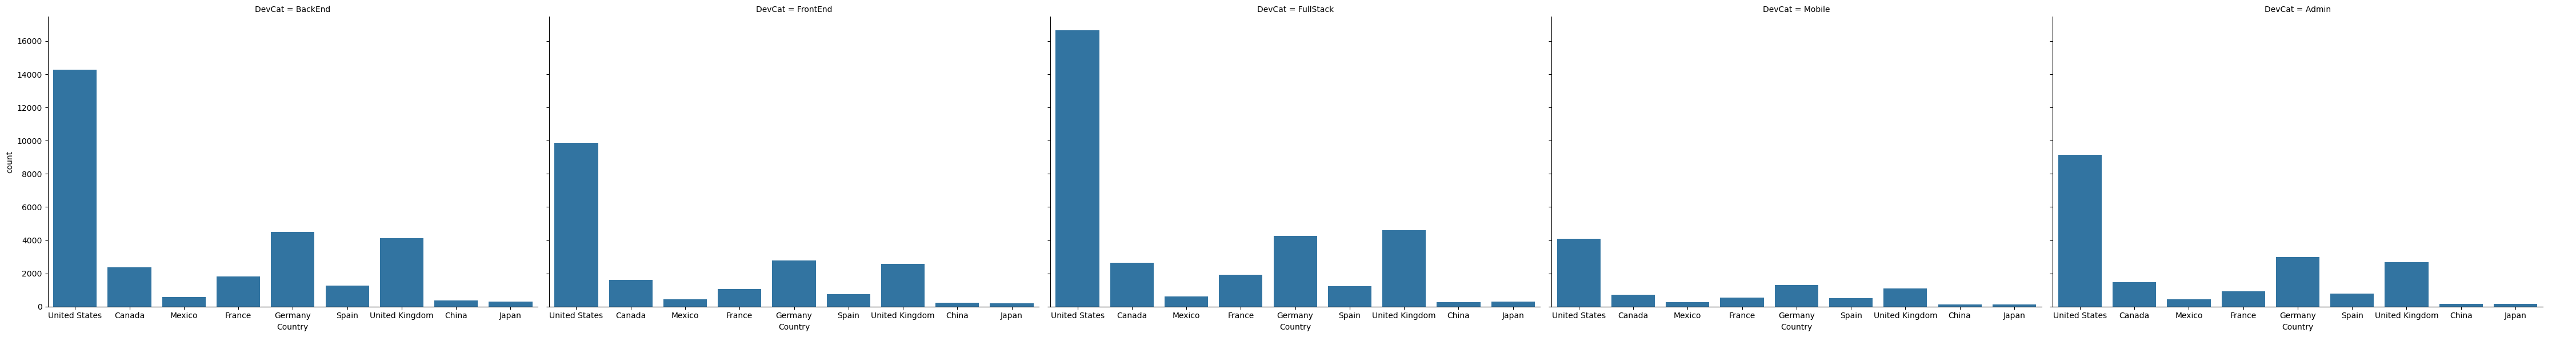

In [5]:
import warnings
warnings.filterwarnings("ignore")

empfig = sns.catplot(x="Country", col="Employment",
                data=df_filtered, kind="count",
                height=6, aspect=1.5);

devdf = df_filtered[['Country','DevType']].reset_index()

devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars=['Country'], 
                   value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
                   var_name='DevCat',
                   value_name='DevFlag')


devdf.dropna(how='any', inplace=True)

devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);

    RespondentID UndergradMajor
7              3            NaN
15             6            NaN
16             6            NaN
18             7            NaN
40            14            NaN
RespondentID      12756
UndergradMajor        0
dtype: int64
   RespondentID  Year        Country          Employment  \
0             1  2018  United States  Employed full-time   
1             1  2019  United States  Employed full-time   
2             1  2020  United States  Employed full-time   
3             2  2018  United States  Employed full-time   
4             2  2019  United States  Employed full-time   

                                      UndergradMajor  \
0  Computer science, computer engineering, or sof...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                                             DevT

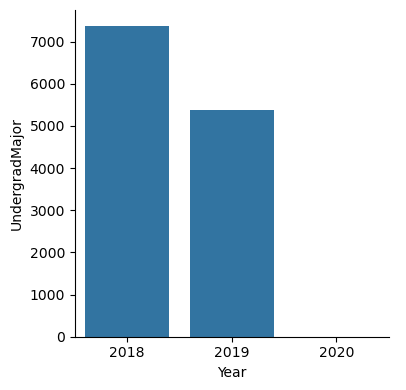

In [51]:
df = pd.read_csv('developer_dataset.csv')

## shows all rows where UndergradMajor is null
temp = df[['RespondentID','UndergradMajor']][df['UndergradMajor'].isnull()]
print(temp.head())
print(temp.count())

## show the count of records that have UndergradMajor as null, per year
missing_undergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(x='Year',
            y='UndergradMajor',
            data=missing_undergrad,
            kind='bar',
            height=4,
            aspect=1);

## sort by id and year and apply NOCB

df = df.sort_values(['RespondentID', 'Year'])
print(df.head())
df['UndergradMajor'].bfill(axis=0, inplace=True)

   Year         EduCat EduFlag
0  2018  SocialScience     NaN
1  2019  SocialScience     NaN
2  2020  SocialScience     NaN
3  2018  SocialScience     NaN
4  2019  SocialScience     NaN


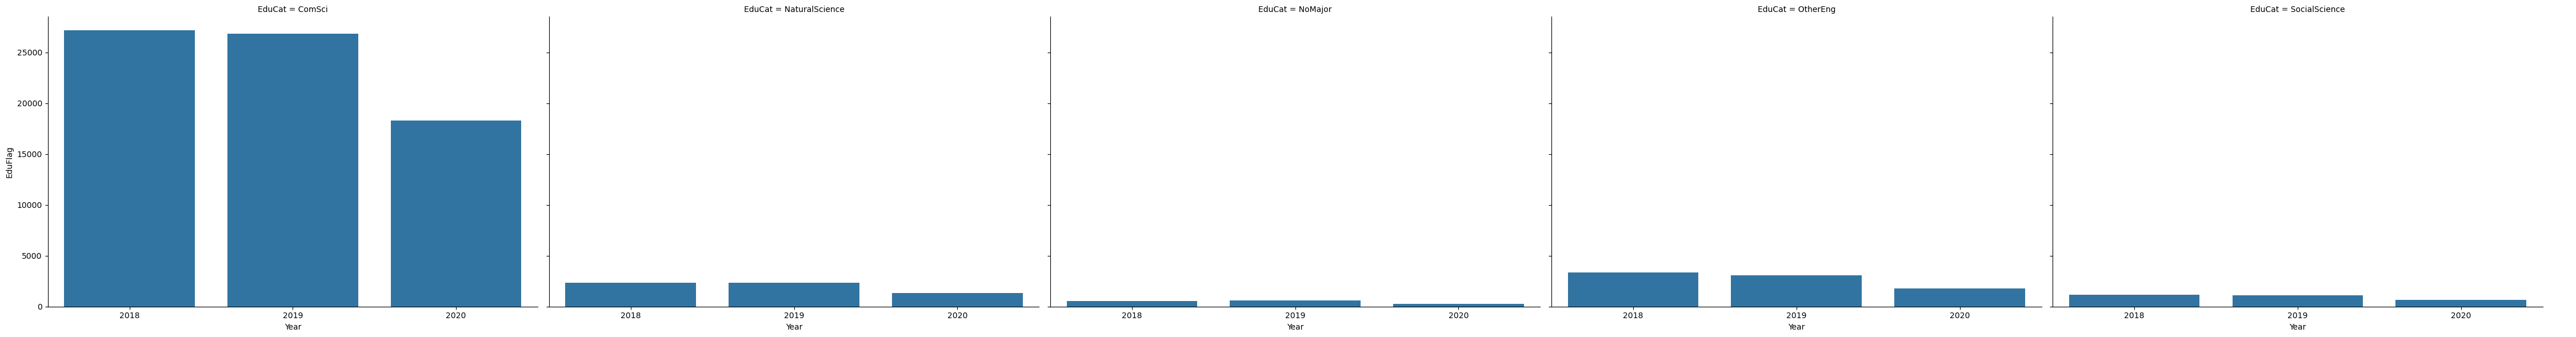

In [53]:
# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()

eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);

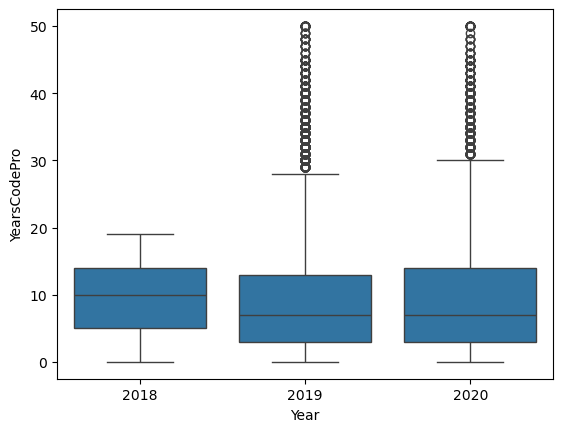

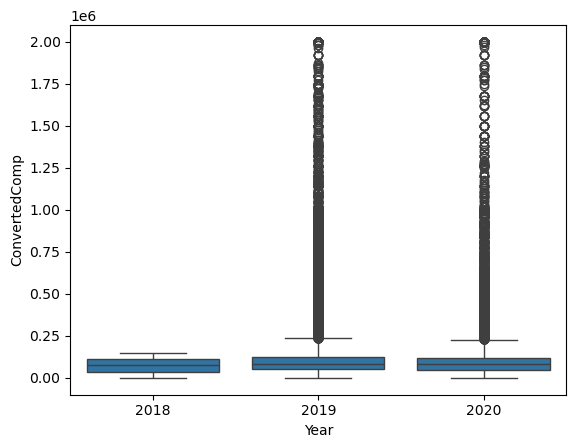

      ConvertedComp
Year               
2018   74746.229046
2019  160877.588540
2020  131538.749358
              ConvertedComp
YearsCodePro               
0.0            73580.954163
1.0           122774.796588
2.0           124609.175867
3.0           129609.345898
4.0           138661.715102
5.0           140250.331934
6.0           130935.029701
7.0           135099.436386
8.0           140614.989090
9.0           125563.730419
10.0          145738.049194
11.0          114668.612977
12.0          129889.240310
13.0          129465.860180
14.0          114868.210297
15.0          125879.527447
16.0          106310.101825
17.0          107714.697611
18.0          119568.313043
19.0          108487.422713
20.0          186055.611025
21.0          163096.600375
22.0          176798.619784
23.0          186694.375000
24.0          177847.250712
25.0          179038.543536
26.0          202189.060606
27.0          191721.352381
28.0          192541.320197
29.0          170368.138211
30.0

In [91]:
import matplotlib.pyplot as plt

## Examine the relationship between years of experience and compensation
df = pd.read_csv('developer_dataset.csv')

comp_fields = df[['Year', 'YearsCodePro', 'ConvertedComp']]
comp_fields.isnull().sum()

D = sns.boxplot(x='Year',
                y='YearsCodePro',
                data=comp_fields)
plt.show()

E = sns.boxplot(x='Year',
                y='ConvertedComp',
                data=comp_fields)
plt.show()

compByYear = comp_fields[['Year','ConvertedComp']].groupby('Year').mean()
print(compByYear)

compByProYears = comp_fields[['YearsCodePro','ConvertedComp']].groupby('YearsCodePro').mean()
print(compByProYears)


                

<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

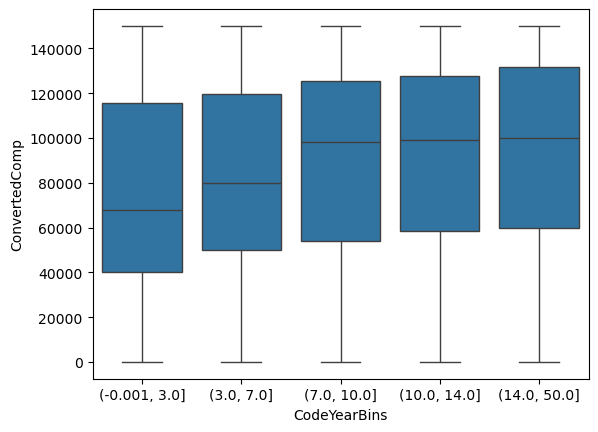

In [99]:
## Use Multiple Imputation to fill the missing values, because we proved above that there is a strong correlation between the variables

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the test dataset
imp.fit(imputedf)

# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)
